In [15]:
!pip install google_play_scraper

In [16]:
!pip install app_store_scraper

In [17]:
!pip install uuid

In [18]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid

In [20]:
g_reviews = reviews_all(
        "com.canva.editor",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='IN', # defaults to 'IN'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )


In [21]:
g_reviews

[{'reviewId': 'b0becc18-9c9d-4bdc-bcaf-f635e0246c62',
  'userName': 'Ime Essien',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocJchau_pamG6iFYDANoO8VHHLTC21a7TkwTb6gtu1ul=mo',
  'content': 'love the app for creating designs and lots more',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.243.0',
  'at': datetime.datetime(2024, 1, 1, 11, 52, 31),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.243.0'},
 {'reviewId': '97e099d4-abf9-4f06-af27-62273fbd3d55',
  'userName': 'Dianne Vibar',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIdjOxgJhwnJDgK7bMjeI-tXCIPLJ3_5d4IrtBLgslo=mo',
  'content': 'so enjoyable',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.244.0',
  'at': datetime.datetime(2024, 1, 1, 11, 52, 20),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.244.0'},
 {'reviewId': '3d75584a-eeac-43b2-92f0-c55a340ec7c9',
  'userName': 'Quadri Hasheem',
  'userImage': 'https://play-lh.googleuse

In [22]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

In [27]:
g_df2

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b0becc18-9c9d-4bdc-bcaf-f635e0246c62,Ime Essien,https://play-lh.googleusercontent.com/a/ACg8oc...,love the app for creating designs and lots more,5,0,2.243.0,2024-01-01 11:52:31,None,NaT,2.243.0
1,97e099d4-abf9-4f06-af27-62273fbd3d55,Dianne Vibar,https://play-lh.googleusercontent.com/a/ACg8oc...,so enjoyable,5,0,2.244.0,2024-01-01 11:52:20,None,NaT,2.244.0
2,3d75584a-eeac-43b2-92f0-c55a340ec7c9,Quadri Hasheem,https://play-lh.googleusercontent.com/a/ACg8oc...,Very nice and easy to use. tombs up for the de...,5,0,2.244.0,2024-01-01 11:50:08,None,NaT,2.244.0
3,e1b2e3f0-d5ba-497a-9691-4e5c24dd07c8,tolu bello,https://play-lh.googleusercontent.com/a/ACg8oc...,Why has navigation and loading templates becom...,2,0,None,2024-01-01 11:49:41,None,NaT,None
4,b78fb40c-0a17-4f1b-b407-d0728fd7448c,Fact Motivation,https://play-lh.googleusercontent.com/a-/ALV-U...,नाइस एप,4,0,2.244.0,2024-01-01 11:48:40,None,NaT,2.244.0
...,...,...,...,...,...,...,...,...,...,...,...
8751,6ca0004f-30af-44a3-aa5e-c0fbb66adafc,Owoniyi Daniel,https://play-lh.googleusercontent.com/a/ACg8oc...,Very easy to make a nice design,5,0,2.237.0,2023-12-11 08:13:27,None,NaT,2.237.0
8752,7c69bc2f-7aac-4a46-9204-19d628ca0a38,Mahesh Koppala,https://play-lh.googleusercontent.com/a/ACg8oc...,super undi,4,0,2.241.0,2023-12-11 08:13:06,"Hello Mahesh, thanks for the feedback and for ...",2023-12-14 08:30:39,2.241.0
8753,9ee221f0-fad0-499f-a8c1-d84925b1e7a6,Hamza Damroth,https://play-lh.googleusercontent.com/a-/ALV-U...,Very Good For Beginners for Small businesses,5,0,2.242.0,2023-12-11 08:06:58,None,NaT,2.242.0
8754,d19eb529-6e10-4597-b612-f19529a201c5,Sʜᴀɪᴋᴢᴀᴀᴅᴀ.,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent 👌🏻,5,0,2.242.0,2023-12-11 08:05:22,None,NaT,2.242.0


In [28]:
g_df2.drop(columns={'userImage', 'reviewCreatedVersion','reviewId','at','replyContent','repliedAt', 'thumbsUpCount'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'content': 'review_description'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'us'

In [29]:
g_df2.drop(columns={'country_code','review_title','source'},inplace = True)

In [30]:
g_df2

,user_name,review_description,rating,appVersion,laguage_code
0,Ime Essien,love the app for creating designs and lots more,5,2.243.0,en
1,Dianne Vibar,so enjoyable,5,2.244.0,en
2,Quadri Hasheem,Very nice and easy to use. tombs up for the de...,5,2.244.0,en
3,tolu bello,Why has navigation and loading templates becom...,2,None,en
4,Fact Motivation,नाइस एप,4,2.244.0,en
...,...,...,...,...,...
8751,Owoniyi Daniel,Very easy to make a nice design,5,2.237.0,en
8752,Mahesh Koppala,super undi,4,2.241.0,en
8753,Hamza Damroth,Very Good For Beginners for Small businesses,5,2.242.0,en
8754,Sʜᴀɪᴋᴢᴀᴀᴅᴀ.,Excellent 👌🏻,5,2.242.0,en


In [31]:
g_df2['review_description'][6]

'good app for editing photos'

In [32]:
g_df2['lower'] = g_df2['review_description'].apply(lambda x: " ".join(x.lower()  for x in x.split()))


In [33]:
g_df2.drop(columns={'review_description'},inplace=True)

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
g_df2.lower.apply(lambda x: "".join(i for i in x if i not  in string.punctuation))

0         love the app for creating designs and lots more
1                                            so enjoyable
2       very nice and easy to use tombs up for the dev...
3       why has navigation and loading templates becom...
4                                                 नाइस एप
                              ...                        
8751                      very easy to make a nice design
8752                                           super undi
8753         very good for beginners for small businesses
8754                                         excellent 👌🏻
8755                                    thanks developers
Name: lower, Length: 8756, dtype: object

In [36]:
g_df2

,user_name,rating,appVersion,laguage_code,lower
0,Ime Essien,5,2.243.0,en,love the app for creating designs and lots more
1,Dianne Vibar,5,2.244.0,en,so enjoyable
2,Quadri Hasheem,5,2.244.0,en,very nice and easy to use. tombs up for the de...
3,tolu bello,2,None,en,why has navigation and loading templates becom...
4,Fact Motivation,4,2.244.0,en,नाइस एप
...,...,...,...,...,...
8751,Owoniyi Daniel,5,2.237.0,en,very easy to make a nice design
8752,Mahesh Koppala,4,2.241.0,en,super undi
8753,Hamza Damroth,5,2.242.0,en,very good for beginners for small businesses
8754,Sʜᴀɪᴋᴢᴀᴀᴅᴀ.,5,2.242.0,en,excellent 👌🏻


In [37]:
# !pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
g_df2.lower.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                          love app creating designs lots
1                                               enjoyable
2                         nice easy use. tombs developers
3       navigation loading templates become difficult....
4                                                 नाइस एप
                              ...                        
8751                                easy make nice design
8752                                           super undi
8753                      good beginners small businesses
8754                                         excellent 👌🏻
8755                                    thanks developers
Name: lower, Length: 8756, dtype: object

In [38]:
#Install textblob library
!pip install textblob
from textblob import TextBlob


In [46]:
g_df2['lower'].apply(lambda x: str(TextBlob(x).correct()))

KeyboardInterrupt: ignored

In [41]:
nltk.download('punkt')
g_df2['tokenized_review'] = g_df2['lower'].apply(lambda x: nltk.word_tokenize(x))
g_df2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,user_name,rating,appVersion,laguage_code,lower,tokenized_review
0,Ime Essien,5,2.243.0,en,love the app for creating designs and lots more,"[love, the, app, for, creating, designs, and, ..."
1,Dianne Vibar,5,2.244.0,en,so enjoyable,"[so, enjoyable]"
2,Quadri Hasheem,5,2.244.0,en,very nice and easy to use. tombs up for the de...,"[very, nice, and, easy, to, use, ., tombs, up,..."
3,tolu bello,2,None,en,why has navigation and loading templates becom...,"[why, has, navigation, and, loading, templates..."
4,Fact Motivation,4,2.244.0,en,नाइस एप,"[नाइस, एप]"
...,...,...,...,...,...,...
8751,Owoniyi Daniel,5,2.237.0,en,very easy to make a nice design,"[very, easy, to, make, a, nice, design]"
8752,Mahesh Koppala,4,2.241.0,en,super undi,"[super, undi]"
8753,Hamza Damroth,5,2.242.0,en,very good for beginners for small businesses,"[very, good, for, beginners, for, small, busin..."
8754,Sʜᴀɪᴋᴢᴀᴀᴅᴀ.,5,2.242.0,en,excellent 👌🏻,"[excellent, 👌🏻]"


In [42]:
import nltk
from nltk.stem import PorterStemmer
st = PorterStemmer()
g_df2['lower'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

0              love the app for creat design and lot more
1                                                so enjoy
2       veri nice and easi to use. tomb up for the dev...
3       whi ha navig and load templat becom more diffi...
4                                                 नाइस एप
                              ...                        
8751                      veri easi to make a nice design
8752                                           super undi
8753                  veri good for beginn for small busi
8754                                             excel 👌🏻
8755                                        thank develop
Name: lower, Length: 8756, dtype: object

#EDA

In [43]:
all_words = []
for sentence in g_df2['lower']:
    all_words.extend(sentence.split())
import nltk
nltk.Freq_dist(all_words)

AttributeError: ignored

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

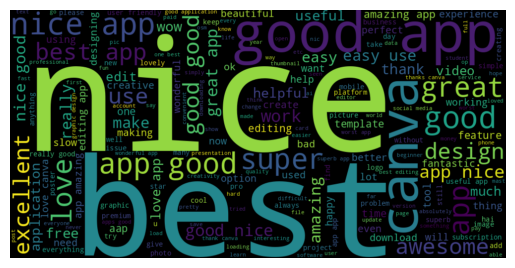

In [45]:
words = []
for message in g_df2['lower']:
    words.extend([word for word in message.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
# prompt: Tf-idf,n-grams,bag of words,bag of words without binary  to predict the next reviews

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a bag-of-words vectorizer
vectorizer = TfidfVectorizer()

# Create a logistic regression model
model = LogisticRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(g_df2['lower'], g_df2['rating'], test_size=0.25)

# Vectorize the training and test data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.7300137048880767


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# prompt: TO SAVE THE MODEL CODE
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [49]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [57]:
# prompt: build a  streamlit webapp to predict the new reviews

import streamlit as st
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from joblib import dump, load

# Load the model
model = load('finalized_model.sav')

# Create a title for the app
st.title('Sentiment Analysis App')

# Get the user's review
review = st.text_input('Enter your review:')

# Predict the sentiment of the review
if review:
    review_vector = vectorizer.transform([review])
    prediction = model.predict(review_vector)

    # Display the prediction
    st.write('Predicted sentiment:', prediction)


2024-01-02 12:16:54.113 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
! streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.194.106:8501

